In [68]:
import pandas as pd
import numpy as np

crime_raw_data = pd.read_csv('../data/2023.csv', encoding='euc-kr')
crime_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분      310 non-null    object
 1   죄종      310 non-null    object
 2   발생검거    310 non-null    object
 3   건수      310 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 9.8+ KB


In [69]:
crime_raw_data[crime_raw_data['죄종'].isnull()]

,구분,죄종,발생검거,건수


In [70]:
crime_raw_data['죄종'] = crime_raw_data['죄종'].replace('강간,추행', '강간')
crime_raw_data['죄종'].unique()

crime_raw_data

,구분,죄종,발생검거,건수
0,중부,살인,발생,2
1,중부,살인,검거,2
2,중부,강도,발생,1
3,중부,강도,검거,1
4,중부,강간,발생,139
...,...,...,...,...
305,수서,강간,검거,168
306,수서,절도,발생,844
307,수서,절도,검거,588
308,수서,폭력,발생,1249


In [71]:
crime_station = crime_raw_data.pivot_table(
    index="구분", columns=["죄종","발생검거"], aggfunc="sum"
)
crime_station.head()

건수                                             
죄종     강간       강도      살인        절도          폭력      
발생검거   검거   발생  검거  발생  검거  발생    검거    발생    검거    발생
구분                                                    
강남    399  489   7  10   6   9   696  1636  2034  2322
강동    122  144   4   5   6   4   980  1676  1383  1569
강북    102  141   1   1   7   7   730   917  1302  1431
강서    225  300   4   6   2   1  1243  1794  2070  2195
관악    268  328  10  10  17  16  1166  2013  2035  2402

In [72]:
df = pd.read_excel("../data/sales-funnel.xlsx")

pd.pivot_table(data=df, index="Name", values="Account")

,Account
Name,
Barton LLC,740150.0
"Fritsch, Russel and Anderson",737550.0
Herman LLC,141962.0
Jerde-Hilpert,412290.0
"Kassulke, Ondricka and Metz",307599.0
Keeling LLC,688981.0
Kiehn-Spinka,146832.0
Koepp Ltd,729833.0
Kulas Inc,218895.0


In [73]:
pd.pivot_table(data=df, index=["Name", "Rep", "Manager"], values=["Account", "Price", "Quantity"])

,,,Account,Price,Quantity
Name,Rep,Manager,,,
Barton LLC,John Smith,Debra Henley,740150.0,35000.0,1.000000
"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,737550.0,35000.0,1.000000
Herman LLC,Cedric Moss,Fred Anderson,141962.0,65000.0,2.000000
Jerde-Hilpert,John Smith,Debra Henley,412290.0,5000.0,2.000000
"Kassulke, Ondricka and Metz",Wendy Yule,Fred Anderson,307599.0,7000.0,3.000000
Keeling LLC,Wendy Yule,Fred Anderson,688981.0,100000.0,5.000000
Kiehn-Spinka,Daniel Hilton,Debra Henley,146832.0,65000.0,2.000000
Koepp Ltd,Wendy Yule,Fred Anderson,729833.0,35000.0,2.000000
Kulas Inc,Daniel Hilton,Debra Henley,218895.0,25000.0,1.500000


In [74]:
pd.pivot_table(data=df, index=["Manager","Rep"], values="Price", aggfunc="sum")

Price
Manager       Rep                  
Debra Henley  Craig Booker    80000
              Daniel Hilton  115000
              John Smith      40000
Fred Anderson Cedric Moss    110000
              Wendy Yule     177000

In [46]:
pd.pivot_table(data=df, index=["Manager","Rep"], values="Price", columns="Product", aggfunc="sum", fill_value=0) 

Product                         CPU  Maintenance  Monitor  Software
Manager       Rep                                                  
Debra Henley  Craig Booker    65000         5000        0     10000
              Daniel Hilton  105000            0        0     10000
              John Smith      35000         5000        0         0
Fred Anderson Cedric Moss     95000         5000        0     10000
              Wendy Yule     165000         7000     5000         0

In [75]:
crime_station.columns = crime_station.columns.droplevel([0])

crime_station.columns

MultiIndex([('강간', '검거'),
            ('강간', '발생'),
            ('강도', '검거'),
            ('강도', '발생'),
            ('살인', '검거'),
            ('살인', '발생'),
            ('절도', '검거'),
            ('절도', '발생'),
            ('폭력', '검거'),
            ('폭력', '발생')],
           names=['죄종', '발생검거'])

In [76]:
tmp = crime_station.columns.get_level_values(0) + \
    crime_station.columns.get_level_values(1)
tmp

Index(['강간검거', '강간발생', '강도검거', '강도발생', '살인검거', '살인발생', '절도검거', '절도발생', '폭력검거',
       '폭력발생'],
      dtype='object')

In [77]:
crime_station.columns = tmp
crime_station.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구분,,,,,,,,,,
강남,399,489,7,10,6,9,696,1636,2034,2322
강동,122,144,4,5,6,4,980,1676,1383,1569
강북,102,141,1,1,7,7,730,917,1302,1431
강서,225,300,4,6,2,1,1243,1794,2070,2195
관악,268,328,10,10,17,16,1166,2013,2035,2402


In [78]:
crime_station.rename(
    columns={
        "강간검거": "성범죄검거",
        "강간발생": "성범죄발생"
    },
    inplace=True,
)

crime_station.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 강남 to 혜화
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   성범죄검거   31 non-null     int64
 1   성범죄발생   31 non-null     int64
 2   강도검거    31 non-null     int64
 3   강도발생    31 non-null     int64
 4   살인검거    31 non-null     int64
 5   살인발생    31 non-null     int64
 6   절도검거    31 non-null     int64
 7   절도발생    31 non-null     int64
 8   폭력검거    31 non-null     int64
 9   폭력발생    31 non-null     int64
dtypes: int64(10)
memory usage: 2.7+ KB


In [79]:
crime_station.head()

,성범죄검거,성범죄발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구분,,,,,,,,,,
강남,399,489,7,10,6,9,696,1636,2034,2322
강동,122,144,4,5,6,4,980,1676,1383,1569
강북,102,141,1,1,7,7,730,917,1302,1431
강서,225,300,4,6,2,1,1243,1794,2070,2195
관악,268,328,10,10,17,16,1166,2013,2035,2402


In [125]:
real_gu = {
    "종로구" : ["종로", "혜화"],
    "중구" : ["남대문", "중부"],
    "용산구" : ["용산"],
    "성동구" : ["성동"],
    "광진구" : ["광진"],
    "동대문구" : ["동대문"],
    "중랑구" : ["중랑"],
    "성북구" : ["성북", "종암"],
    "강북구" : ["강북"],
    "도봉구" : ["도봉"],
    "노원구" : ["노원"],
    "은평구" : ["서부", "은평"],
    "서대문구" : ["서대문"],
    "마포구" : ["마포"],
    "양천구" : ["양천"],
    "강서구" : ["강서"],
    "구로구" : ["구로"],
    "금천구" : ["금천"],                           
    "영등포구" : ["영등포"],
    "동작구" : ["동작"],
    "관악구" : ["관악"],
    "서초구" : ["방배", "서초"],
    "강남구" : ["강남", "수서"],
    "송파구" : ["송파"],
    "강동구" : ["강동"]
}

sum(len(v) for v in real_gu.values())


31

In [126]:
tmp_gu = []

for station in crime_station.index:
    for gu_name, station_name in real_gu.items():
        if station in station_name:
            tmp_gu.append(gu_name)



In [127]:
crime_station["구"] = tmp_gu
crime_station

,성범죄검거,성범죄발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,구
구분,,,,,,,,,,,
강남,399,489,7,10,6,9,696,1636,2034,2322,강남구
강동,122,144,4,5,6,4,980,1676,1383,1569,강동구
강북,102,141,1,1,7,7,730,917,1302,1431,강북구
강서,225,300,4,6,2,1,1243,1794,2070,2195,강서구
관악,268,328,10,10,17,16,1166,2013,2035,2402,관악구
광진,178,238,3,5,2,2,830,1616,1320,1563,광진구
구로,144,194,7,7,12,12,849,1624,1620,1900,구로구
금천,95,128,4,5,3,4,629,987,1022,1116,금천구
남대문,50,73,4,5,1,1,350,603,518,575,중구


In [128]:
print(len(crime_station))
print(len(tmp_gu))

31
31


In [130]:
crime_gu = crime_station.pivot_table(index="구", aggfunc="sum")
crime_gu.head()

,강도검거,강도발생,살인검거,살인발생,성범죄검거,성범죄발생,절도검거,절도발생,폭력검거,폭력발생
구,,,,,,,,,,
강남구,18,20,11,14,567,678,1284,2480,3112,3571
강동구,4,5,6,4,122,144,980,1676,1383,1569
강북구,1,1,7,7,102,141,730,917,1302,1431
강서구,4,6,2,1,225,300,1243,1794,2070,2195
관악구,10,10,17,16,268,328,1166,2013,2035,2402


In [142]:
(crime_gu["절도검거"] / crime_gu["절도발생"]) * 100

구
강남구     51.774194
강동구     58.472554
강북구     79.607415
강서구     69.286511
관악구     57.923497
광진구     51.361386
구로구     52.278325
금천구     63.728470
노원구     51.776961
도봉구     58.492462
동대문구    66.171875
동작구     50.803043
마포구     58.152174
서대문구    55.946399
서초구     48.119526
성동구     52.855543
성북구     69.410569
송파구     51.448675
양천구     51.448675
영등포구    64.293420
용산구     57.361963
은평구     66.294919
종로구     52.865697
중구      56.842105
중랑구     56.062767
dtype: float64

In [131]:
crime_gu["살인발생"].sort_values(ascending=False).head()

구
관악구     16
강남구     14
구로구     12
영등포구    12
송파구      8
Name: 살인발생, dtype: int64

In [143]:
arrest_col = ["강도검거", "살인검거", "성범죄검거", "절도검거", "폭력검거"]
occur_col = ["강도발생", "살인발생", "성범죄발생", "절도발생", "폭력발생"]

In [145]:
arrest_rate = ["강도검거율", "살인검거율", "성범죄검거율", "절도검거율", "폭력검거율"]
crime_gu[arrest_rate] = crime_gu[arrest_col].div(crime_gu[occur_col].values) * 100

In [146]:
crime_gu.head()

,강도검거,강도발생,살인검거,살인발생,성범죄검거,성범죄발생,절도검거,절도발생,폭력검거,폭력발생,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율
구,,,,,,,,,,,,,,,
강남구,18,20,11,14,567,678,1284,2480,3112,3571,90.000000,78.571429,83.628319,51.774194,87.146458
강동구,4,5,6,4,122,144,980,1676,1383,1569,80.000000,150.000000,84.722222,58.472554,88.145315
강북구,1,1,7,7,102,141,730,917,1302,1431,100.000000,100.000000,72.340426,79.607415,90.985325
강서구,4,6,2,1,225,300,1243,1794,2070,2195,66.666667,200.000000,75.000000,69.286511,94.305239
관악구,10,10,17,16,268,328,1166,2013,2035,2402,100.000000,106.250000,81.707317,57.923497,84.721066


In [147]:
crime_gu[crime_gu[arrest_rate] > 100] = 100
crime_gu.head()

,강도검거,강도발생,살인검거,살인발생,성범죄검거,성범죄발생,절도검거,절도발생,폭력검거,폭력발생,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율
구,,,,,,,,,,,,,,,
강남구,18,20,11,14,567,678,1284,2480,3112,3571,90.000000,78.571429,83.628319,51.774194,87.146458
강동구,4,5,6,4,122,144,980,1676,1383,1569,80.000000,100.000000,84.722222,58.472554,88.145315
강북구,1,1,7,7,102,141,730,917,1302,1431,100.000000,100.000000,72.340426,79.607415,90.985325
강서구,4,6,2,1,225,300,1243,1794,2070,2195,66.666667,100.000000,75.000000,69.286511,94.305239
관악구,10,10,17,16,268,328,1166,2013,2035,2402,100.000000,100.000000,81.707317,57.923497,84.721066


In [188]:
crime_gu.head()

,강도,살인,성범죄,절도,폭력,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,20,14,678,2480,3571,90.000000,78.571429,83.628319,51.774194,87.146458
강동구,5,4,144,1676,1569,80.000000,100.000000,84.722222,58.472554,88.145315
강북구,1,7,141,917,1431,100.000000,100.000000,72.340426,79.607415,90.985325
강서구,6,1,300,1794,2195,66.666667,100.000000,75.000000,69.286511,94.305239
관악구,10,16,328,2013,2402,100.000000,100.000000,81.707317,57.923497,84.721066


In [151]:
occur_col = ["강도", "살인", "성범죄", "절도", "폭력"]
occur_col

['강도', '살인', '성범죄', '절도', '폭력']

In [152]:
print("강서구 절도 건수 : ", crime_gu.loc["강서구", "절도"])
print("절도 건수의 최대값 : ", crime_gu["절도"].max())

강서구 절도 건수 :  1794
절도 건수의 최대값 :  2480


In [158]:
crime_gu_norm = crime_gu[occur_col] / crime_gu[occur_col].max()
crime_gu_norm.head()

,강도,살인,성범죄,절도,폭력
구,,,,,
강남구,1.00,0.8750,1.000000,1.000000,1.000000
강동구,0.25,0.2500,0.212389,0.675806,0.439373
강북구,0.05,0.4375,0.207965,0.369758,0.400728
강서구,0.30,0.0625,0.442478,0.723387,0.614674
관악구,0.50,1.0000,0.483776,0.811694,0.672641


In [159]:
crime_gu_norm[arrest_rate] = crime_gu[arrest_rate]
crime_gu_norm.head()

,강도,살인,성범죄,절도,폭력,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,1.00,0.8750,1.000000,1.000000,1.000000,90.000000,78.571429,83.628319,51.774194,87.146458
강동구,0.25,0.2500,0.212389,0.675806,0.439373,80.000000,100.000000,84.722222,58.472554,88.145315
강북구,0.05,0.4375,0.207965,0.369758,0.400728,100.000000,100.000000,72.340426,79.607415,90.985325
강서구,0.30,0.0625,0.442478,0.723387,0.614674,66.666667,100.000000,75.000000,69.286511,94.305239
관악구,0.50,1.0000,0.483776,0.811694,0.672641,100.000000,100.000000,81.707317,57.923497,84.721066


In [162]:
crime_gu_norm[occur_col].loc["강남구"]

강도     1.000
살인     0.875
성범죄    1.000
절도     1.000
폭력     1.000
Name: 강남구, dtype: float64

In [163]:
crime_gu_norm[occur_col].loc["강남구"].sum() / 5

np.float64(0.975)

In [164]:
crime_gu_norm["범죄"] = np.mean(crime_gu_norm[occur_col], axis=1)

In [171]:
crime_gu_norm["검거"] = np.mean(crime_gu_norm[arrest_rate], axis=1)

In [166]:
crime_gu_norm["범죄"].sort_values(ascending=False).head()

구
강남구     0.975000
관악구     0.693622
영등포구    0.615969
송파구     0.614464
서초구     0.576149
Name: 범죄, dtype: float64

In [173]:
crime_gu_norm["검거"].sort_values(ascending=True).head()

구
마포구    71.158807
동작구    71.322536
성동구    71.758511
송파구    71.877542
서초구    72.037556
Name: 검거, dtype: float64

In [175]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [178]:
crime_gu_norm_sort = crime_gu_norm.sort_values(by="검거", ascending=False)
crime_gu_norm_sort.head()

,강도,살인,성범죄,절도,폭력,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율,범죄,검거
구,,,,,,,,,,,,
강북구,0.05,0.4375,0.207965,0.369758,0.400728,100.0,100.0,72.340426,79.607415,90.985325,0.293190,88.586633
성북구,0.05,0.0625,0.207965,0.396774,0.359563,100.0,100.0,79.432624,69.410569,90.420561,0.215360,87.852751
용산구,0.15,0.1875,0.361357,0.394355,0.485018,100.0,100.0,89.387755,57.361963,85.508083,0.315646,86.451560
관악구,0.50,1.0000,0.483776,0.811694,0.672641,100.0,100.0,81.707317,57.923497,84.721066,0.693622,84.870376
중랑구,0.10,0.3750,0.249263,0.565323,0.488659,100.0,100.0,79.289941,56.062767,88.595989,0.355649,84.789739


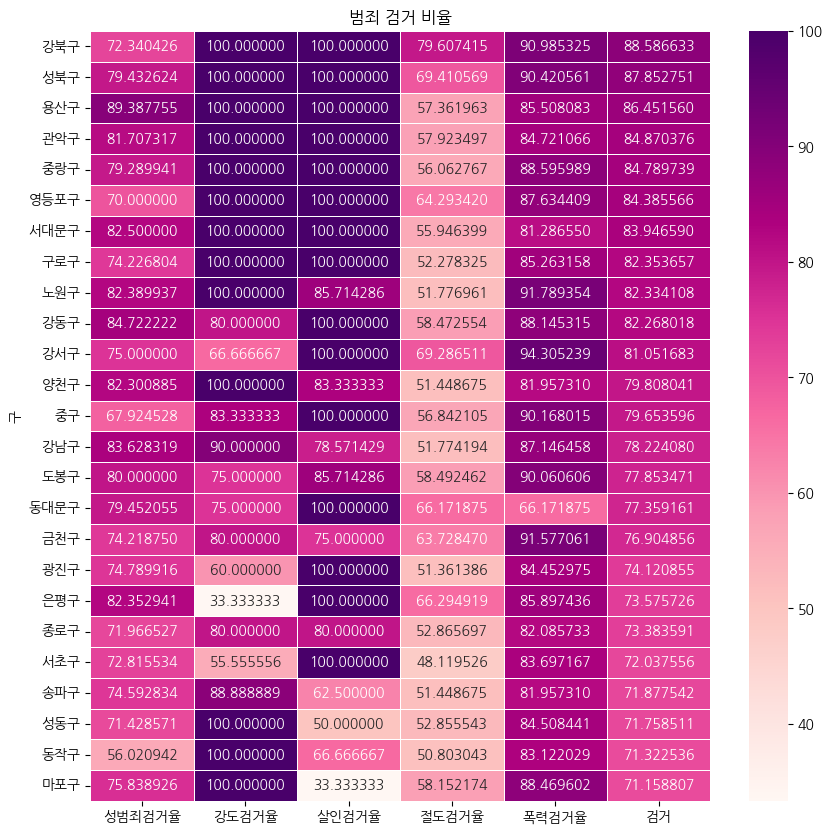

In [182]:
targel_col = [
    "성범죄검거율",
    "강도검거율",
    "살인검거율",
    "절도검거율",
    "폭력검거율",
    "검거"
]

plt.figure(figsize=(10,10))
sns.heatmap(
    crime_gu_norm_sort[targel_col], annot=True, fmt="f", linewidths=0.5, cmap="RdPu"
)
plt.title("범죄 검거 비율")
plt.show()

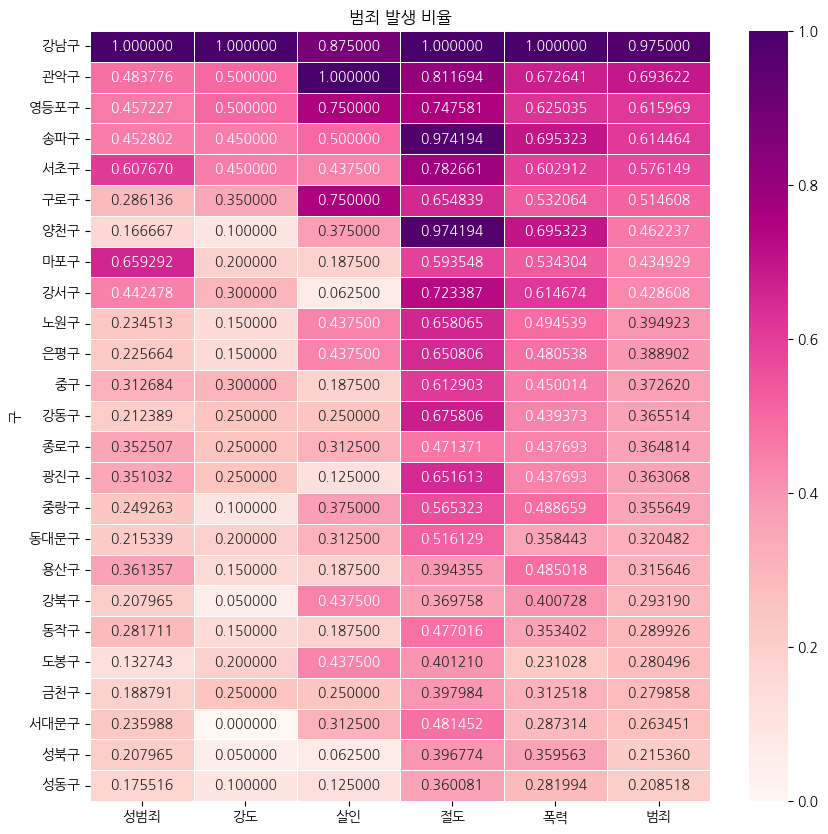

In [ ]:
targel_col = ["성범죄", "강도", "살인", "절도", "폭력", "범죄"]
crime_gu_norm_sort = crime_gu_norm.sort_values(by="범죄", ascending=False)

plt.figure(figsize=(10, 10))
sns.heatmap(
    crime_gu_norm_sort[targel_col], annot=True, fmt="f", linewidths=0.5, cmap="RdPu"
)
plt.title("범죄 발생 비율")
plt.show()

In [187]:
crime_gu_norm.to_csv("../data/seoul_crime_result.csv", sep=",", encoding="utf-8")

In [203]:
import folium

In [207]:
folium.Map(location=[37.4780333, 126.8790086], tiles="Cartodb Positron", zoom_start=16)

In [216]:
my_map = folium.Map(
    location = [37.4780333, 126.8790086], zoom_start=20, tiles="OpenTopoMap"
)

folium.Marker(
    [37.4816268, 126.8829256], popup="<i>Gasan Digital Complex Station</i>"
).add_to(my_map)

folium.Marker(
    [37.478333, 126.8790086], popup="<i>AddinEdu Academy/i>"
).add_to(my_map)

my_map

In [226]:
m = folium.Map(
    location=[46.1991, -122.1889], tiles="OpenTopoMap",
    zoom_start=13)
m.add_child(folium.LatLngPopup())
m

In [221]:
m = folium.Map(
    location=[46.1991, -122.1889], tiles="CartoDB positron",
    zoom_start=13)
m.add_child(folium.LatLngPopup())

In [229]:
# 미국 앨라배마(Alabama)의 중심 좌표
alabama_center = [32.8067, -86.7911]

# 지도 생성
m = folium.Map(location=alabama_center, zoom_start=6)

# 마커 추가
folium.Marker(
    location=alabama_center,
    popup="Alabama, USA",
    tooltip="Click for info"
).add_to(m)

# 지도 출력
m

In [232]:
import json
import pandas as pd
import folium

state_data = pd.read_csv("../data/02. US_Unemployment_Oct2012.csv")
m = folium.Map(location=[48, -102], zoom_start=3)
folium.Choropleth(
    geo_data="../data/02. us-states.json",
    data=state_data,
    columns=["State", "Unemployment"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Unemployment Rate(%)"
).add_to(m)

m

In [242]:
crime_anal_norm = pd.read_csv("../data/seoul_crime_result.csv", index_col=0, encoding="utf-8")

geo_path = "../data/02. skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding="utf-8"))

In [1]:
import folium
import pandas as pd
import json


crime_anal_norm = pd.read_csv("../data/seoul_crime_result.csv", index_col=0, encoding="utf-8")

geo_path = "../data/02. skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding="utf-8"))



my_map = folium.Map(
    location=[37.5502, 126.982], zoom_start=11, tiles="cartodb positron"
)

folium.Choropleth(
    geo_data=geo_str,
    data=crime_anal_norm["살인"],
    columns=[crime_anal_norm.index, crime_anal_norm["살인"]],
    fill_color="PuRd",
    key_on="feature.id",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="정규화된 살인 발생 건수"
).add_to(my_map)

my_map


In [2]:


my_map = folium.Map(
    location=[37.5502, 126.982], zoom_start=11, tiles="cartodb positron"
)

folium.Choropleth(
    geo_data=geo_str,
    data=crime_anal_norm["성범죄"],
    columns=[crime_anal_norm.index, crime_anal_norm["성범죄"]],
    fill_color="PuRd",
    key_on="feature.id",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="정규화된 성범죄 발생 건수"
).add_to(my_map)

my_map


In [2]:
import os

os.listdir("../data/crime")

['2020년.csv',
 '2013년.csv',
 '2014년.csv',
 '2001년.csv',
 '2017년.csv',
 '2005년.csv',
 '2016년.csv',
 '2011년.csv',
 '2002년.csv',
 '2000년.csv',
 '2007년.csv',
 '2015년.csv',
 '2008년.csv',
 '2018년.csv',
 '2003년.csv',
 '2023년.csv',
 '2022년.csv',
 '2009년.csv',
 '2010년.csv',
 '2004년.csv',
 '2012년.csv',
 '2019년.csv',
 '2021년.csv',
 '2006년.csv']

In [3]:
from glob import glob

glob("../data/crime/*")

['../data/crime/2020년.csv',
 '../data/crime/2013년.csv',
 '../data/crime/2014년.csv',
 '../data/crime/2001년.csv',
 '../data/crime/2017년.csv',
 '../data/crime/2005년.csv',
 '../data/crime/2016년.csv',
 '../data/crime/2011년.csv',
 '../data/crime/2002년.csv',
 '../data/crime/2000년.csv',
 '../data/crime/2007년.csv',
 '../data/crime/2015년.csv',
 '../data/crime/2008년.csv',
 '../data/crime/2018년.csv',
 '../data/crime/2003년.csv',
 '../data/crime/2023년.csv',
 '../data/crime/2022년.csv',
 '../data/crime/2009년.csv',
 '../data/crime/2010년.csv',
 '../data/crime/2004년.csv',
 '../data/crime/2012년.csv',
 '../data/crime/2019년.csv',
 '../data/crime/2021년.csv',
 '../data/crime/2006년.csv']

In [9]:
target_path = "../data/crime/"
file_list = glob(target_path + "20*.csv")

file_list


['../data/crime/2020년.csv',
 '../data/crime/2013년.csv',
 '../data/crime/2014년.csv',
 '../data/crime/2001년.csv',
 '../data/crime/2017년.csv',
 '../data/crime/2005년.csv',
 '../data/crime/2016년.csv',
 '../data/crime/2011년.csv',
 '../data/crime/2002년.csv',
 '../data/crime/2000년.csv',
 '../data/crime/2007년.csv',
 '../data/crime/2015년.csv',
 '../data/crime/2008년.csv',
 '../data/crime/2018년.csv',
 '../data/crime/2003년.csv',
 '../data/crime/2023년.csv',
 '../data/crime/2022년.csv',
 '../data/crime/2009년.csv',
 '../data/crime/2010년.csv',
 '../data/crime/2004년.csv',
 '../data/crime/2012년.csv',
 '../data/crime/2019년.csv',
 '../data/crime/2021년.csv',
 '../data/crime/2006년.csv']

In [11]:
for each_file in file_list:
    print(each_file)

../data/crime/2020년.csv
../data/crime/2013년.csv
../data/crime/2014년.csv
../data/crime/2001년.csv
../data/crime/2017년.csv
../data/crime/2005년.csv
../data/crime/2016년.csv
../data/crime/2011년.csv
../data/crime/2002년.csv
../data/crime/2000년.csv
../data/crime/2007년.csv
../data/crime/2015년.csv
../data/crime/2008년.csv
../data/crime/2018년.csv
../data/crime/2003년.csv
../data/crime/2023년.csv
../data/crime/2022년.csv
../data/crime/2009년.csv
../data/crime/2010년.csv
../data/crime/2004년.csv
../data/crime/2012년.csv
../data/crime/2019년.csv
../data/crime/2021년.csv
../data/crime/2006년.csv


In [32]:
import pandas as pd
import numpy as np

crime_raw_data = pd.read_csv(file_list[0], usecols=[0,1,2,3], encoding="euc-kr")
crime_raw_data["죄종"] = crime_raw_data["죄종"].replace("강간,추행", "강간")

crime_station = crime_raw_data.pivot_table(
    crime_raw_data, index=["구분"], columns=["죄종", "발생검거"], aggfunc="sum"
)

crime_station.columns = [
    "강간검거",
    "강간",
    "강도검거",
    "강도",
    "살인검거",
    "살인",
    "절도검거",
    "절도",
    "폭력검거",
    "폭력"
]

crime_station["year"] = 2000
crime_station.head()

,강간검거,강간,강도검거,강도,살인검거,살인,절도검거,절도,폭력검거,폭력,year
구분,,,,,,,,,,,
강남,433,513,10,12,3,5,1016,1941,1911,2283,2000
강동,167,188,14,15,3,3,781,1640,1697,1942,2000
강북,132,159,4,5,8,9,490,780,1625,1817,2000
강서,222,265,5,6,9,10,1070,1689,2087,2445,2000
관악,351,403,3,3,12,12,1137,2229,2355,2614,2000


In [17]:
for each_file in file_list:
    print(each_file.split("/")[-1][:4])

2020
2013
2014
2001
2017
2005
2016
2011
2002
2000
2007
2015
2008
2018
2003
2023
2022
2009
2010
2004
2012
2019
2021
2006


In [33]:
crime_station_t = []

for each_file in file_list:
    print("file reading...", each_file)

    crime_raw_data = pd.read_csv(each_file, usecols=[0,1,2,3], encoding="euc-kr")
    crime_raw_data["죄종"] = crime_raw_data["죄종"].replace("강간,추행", "강간")

    crime_station = crime_raw_data.pivot_table(
    crime_raw_data, index=["구분"], columns=["죄종", "발생검거"], aggfunc="sum"
    )

    crime_station.columns = [
        "강간검거",
        "강간",
        "강도검거",
        "강도",
        "살인검거",
        "살인",
        "절도검거",
        "절도",
        "폭력검거",
        "폭력"
]

    crime_station["year"] = each_file.split("/")[-1][:4]

    crime_station.reset_index(inplace=True)
    crime_station_t.append(crime_station)


file reading... ../data/crime/2020년.csv
file reading... ../data/crime/2013년.csv
file reading... ../data/crime/2014년.csv
file reading... ../data/crime/2001년.csv
file reading... ../data/crime/2017년.csv
file reading... ../data/crime/2005년.csv
file reading... ../data/crime/2016년.csv
file reading... ../data/crime/2011년.csv
file reading... ../data/crime/2002년.csv
file reading... ../data/crime/2000년.csv
file reading... ../data/crime/2007년.csv
file reading... ../data/crime/2015년.csv
file reading... ../data/crime/2008년.csv
file reading... ../data/crime/2018년.csv
file reading... ../data/crime/2003년.csv
file reading... ../data/crime/2023년.csv
file reading... ../data/crime/2022년.csv
file reading... ../data/crime/2009년.csv
file reading... ../data/crime/2010년.csv
file reading... ../data/crime/2004년.csv
file reading... ../data/crime/2012년.csv
file reading... ../data/crime/2019년.csv
file reading... ../data/crime/2021년.csv
file reading... ../data/crime/2006년.csv


In [34]:
crime_total = pd.concat(crime_station_t)
crime_total.head()

,구분,강간검거,강간,강도검거,강도,살인검거,살인,절도검거,절도,폭력검거,폭력,year
0,강남,433.0,513.0,10.0,12.0,3.0,5.0,1016.0,1941.0,1911.0,2283.0,2020
1,강동,167.0,188.0,14.0,15.0,3.0,3.0,781.0,1640.0,1697.0,1942.0,2020
2,강북,132.0,159.0,4.0,5.0,8.0,9.0,490.0,780.0,1625.0,1817.0,2020
3,강서,222.0,265.0,5.0,6.0,9.0,10.0,1070.0,1689.0,2087.0,2445.0,2020
4,관악,351.0,403.0,3.0,3.0,12.0,12.0,1137.0,2229.0,2355.0,2614.0,2020


In [35]:
crime_total_murder = crime_total.pivot_table(index="year", columns="구분", values="살인")
crime_total_murder

구분,강남,강동,강북,강서,관악,광진,구로,금천,남대문,노원,...,수서,양천,영등포,용산,은평,종로,종암,중랑,중부,혜화
year,,,,,,,,,,,,,,,,,,,,,
2000,3.0,12.0,9.0,6.0,8.0,2.0,10.0,10.0,3.0,3.0,...,3.0,5.0,6.0,5.0,2.0,4.0,8.0,13.0,1.0,3.0
2001,13.0,9.0,6.0,16.0,3.0,14.0,4.0,13.0,6.0,8.0,...,4.0,8.0,7.0,3.0,6.0,3.0,10.0,16.0,0.0,4.0
2002,3.0,6.0,7.0,8.0,8.0,12.0,4.0,16.0,2.0,7.0,...,7.0,6.0,3.0,2.0,3.0,0.0,5.0,8.0,1.0,4.0
2003,7.0,6.0,9.0,5.0,4.0,6.0,6.0,15.0,2.0,3.0,...,5.0,7.0,8.0,14.0,5.0,3.0,2.0,11.0,0.0,5.0
2004,8.0,7.0,15.0,8.0,0.0,10.0,13.0,16.0,1.0,5.0,...,6.0,6.0,5.0,8.0,5.0,1.0,7.0,7.0,2.0,7.0
2005,8.0,5.0,10.0,10.0,5.0,16.0,10.0,14.0,1.0,10.0,...,5.0,12.0,4.0,9.0,7.0,3.0,6.0,14.0,2.0,2.0
2006,5.0,4.0,5.0,16.0,5.0,7.0,16.0,5.0,2.0,6.0,...,4.0,5.0,12.0,9.0,3.0,7.0,6.0,11.0,4.0,5.0
2007,8.0,7.0,12.0,4.0,13.0,8.0,19.0,6.0,0.0,11.0,...,4.0,8.0,13.0,9.0,6.0,5.0,8.0,13.0,4.0,2.0
2008,10.0,8.0,7.0,18.0,10.0,3.0,22.0,3.0,1.0,3.0,...,3.0,11.0,19.0,7.0,7.0,5.0,5.0,7.0,4.0,3.0


<function matplotlib.pyplot.show(close=None, block=None)>

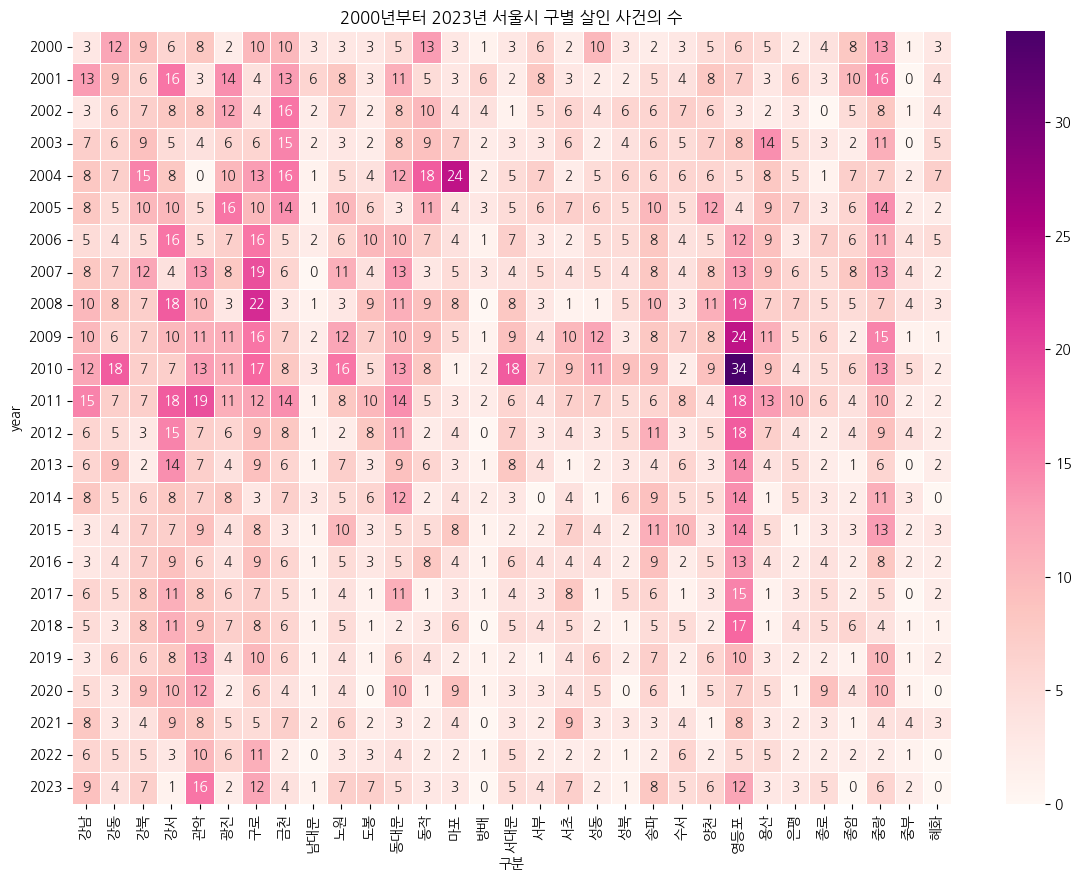

In [36]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

plt.figure(figsize=(13,10))
sns.heatmap(crime_total_murder, annot=True, linewidths=0.5, cmap="RdPu")
plt.title("2000년부터 2023년 서울시 구별 살인 사건의 수")
plt.autoscale()
plt.tight_layout(pad=5)
plt.show

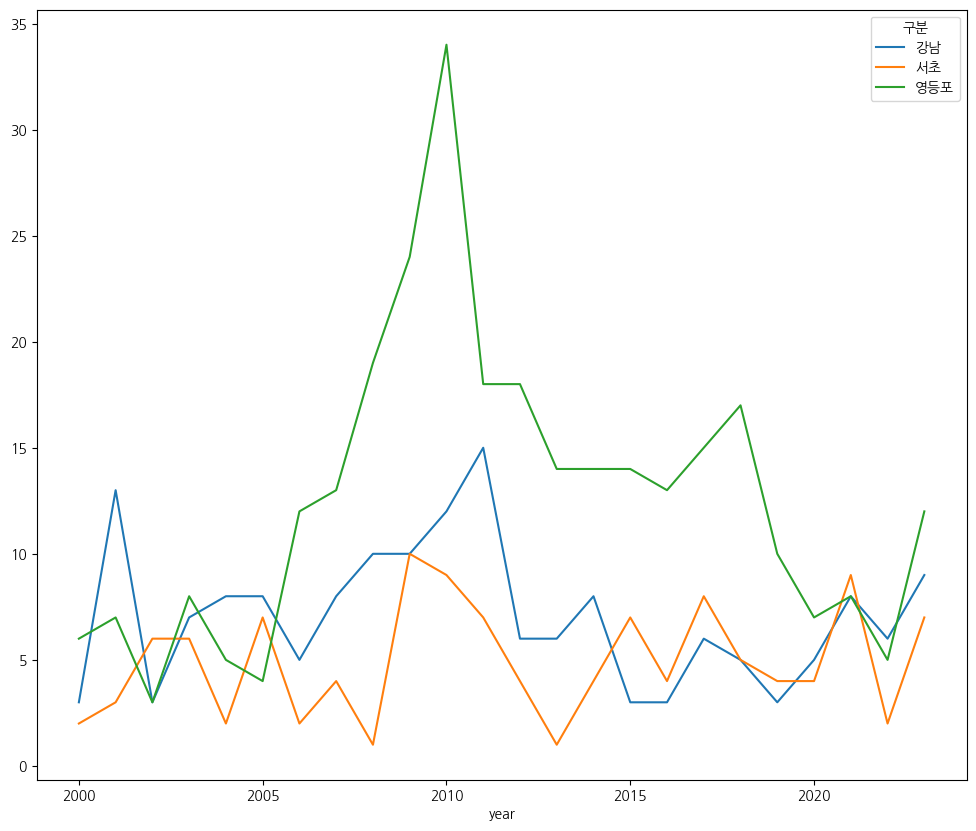

In [38]:
crime_total_murder[["강남","서초","영등포"]].plot(figsize=(12,10))
plt.show()

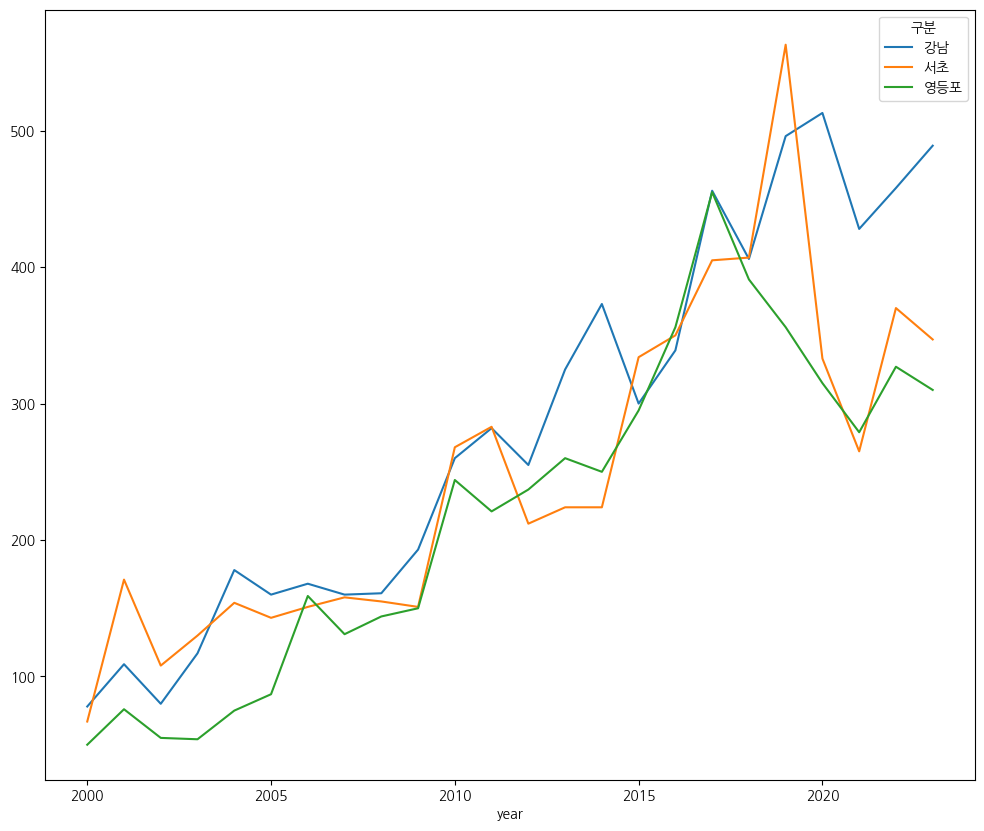

In [39]:
crime_total_sexual = crime_total.pivot_table(index="year", columns="구분", values="강간")
crime_total_sexual[["강남","서초","영등포"]].plot(figsize=(12,10))
plt.show()